In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.io import readsav

from create_spec import create_spec
from fit2gauss import fit2gauss

import iris_lmsalpy.extract_irisL2data as extract_irisL2data

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
path = '/Users/WilliamHenryAshfieldIV/dat/iris/'
filename = 'rast_data.sav'
fn = path+filename

In [3]:
ro = readsav(fn,verbose=False,python_dict=False)

In [4]:
data = ro.rast['data'][0]
wl = ro.rast['wl'][0]
err = ro.rast['err'][0]

In [5]:
time = 1426

In [6]:
fit = fit2gauss(wl,data[time,:],err[time,:],verbose=True)

est params =  [128.02371621597493, 1404.2787168590876, 0.1, 1485.4690272321277, 1402.7101595578433, 0.1]
single peak found
only one peak still
new init params =  [5871.000000000001, 1402.8031078679217, 0.1, 6.583333333333334, 1403.617187867845, 0.1]
a2g = [5.11552187e+03 1.40284468e+03 1.21837909e-01 3.65819908e+01
 1.40356953e+03 2.75062504e+00]
a1g[0] = 5132.976395863342
chi2g =  434.58803581915987
a2g =  [5.13297640e+03 1.40284536e+03 1.23391795e-01 0.00000000e+00
 1.40284536e+03 1.23391795e-01]
chi1g =  414.5731810960229
chi2g =  -1.0


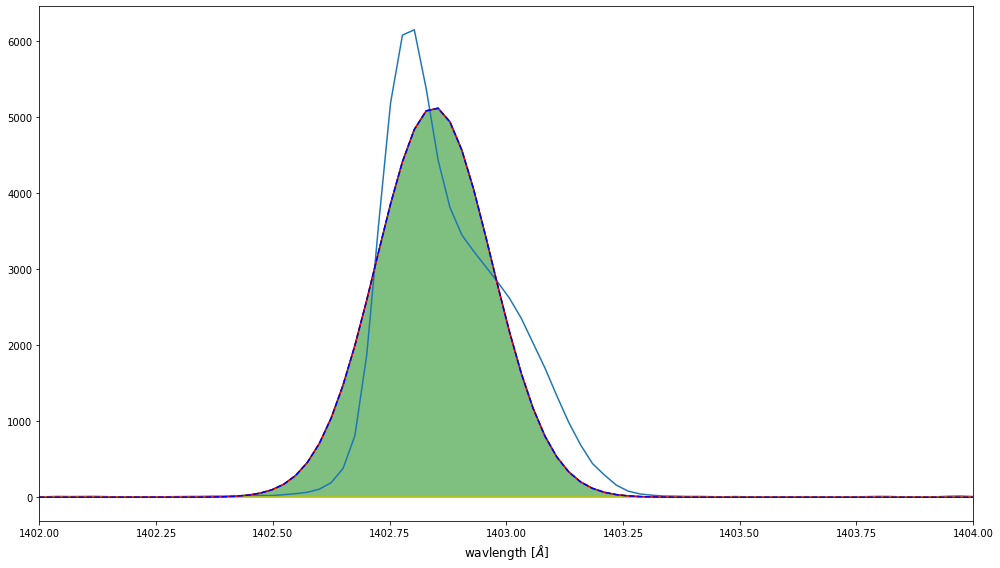

In [7]:
# extract arrays
y2a = fit["y2a"]
y2b = fit["y2b"]
y1g = fit["y1g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectrum
ax1.plot(wl, data[time,:])

# peak 1
ax1.plot(wl, y2a, "g")
ax1.fill_between(wl, y2a.min(), y2a, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(wl, y2b, "y")
ax1.fill_between(wl, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 

#both
ax1.plot(wl,y2a+y2b, "r")

# single fit
ax1.plot(wl,y1g,'b--')
    
ax1.set_xlim(1402.,1404)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
fig.tight_layout()

In [8]:
a1g = fit["a1g"]
a2g = fit["a2g"]

line = 1402.77
l1 = a2g[1]
l2 = a2g[4]
v1 = (l1-line)/line*3e5
v2 = (l2-line)/line*3e5

print('blue velocity = ',v1,'-----', '"red" velocity = ', v2)

blue velocity =  16.115659644216052 ----- "red" velocity =  16.115659644216052


In [20]:
# animate:
data = data[1000:,:]
err = err[1000:,:]

IndexError: too many indices for array

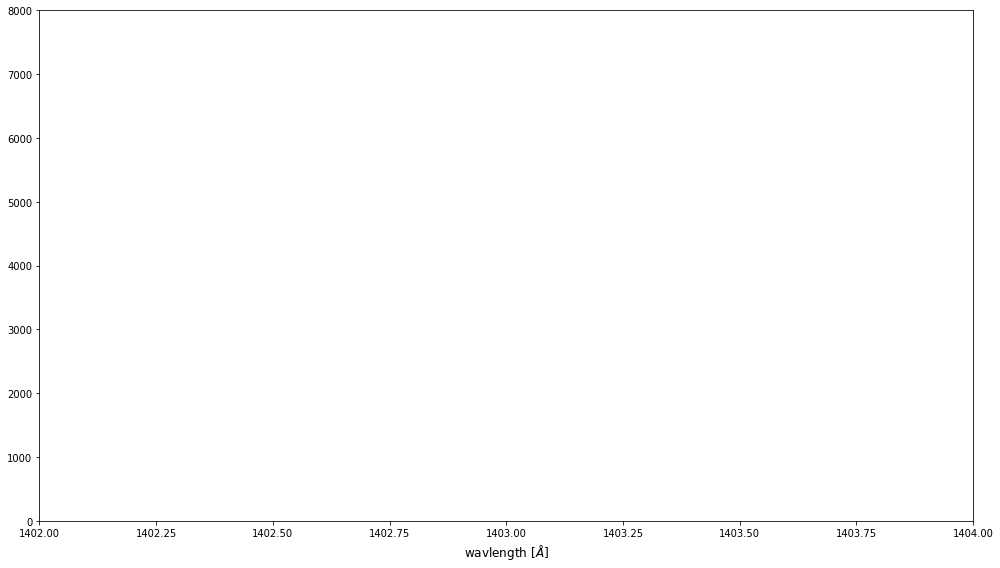

In [21]:

fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectrum
#ax1.plot(wl, data[time,:])

# peak 1
#$ax1.plot(wl, y2a, "g")
#ax1.fill_between(wl, y2a.min(), y2a, facecolor="green", alpha=0.5)
  
# peak 2
#ax1.plot(wl, y2b, "y")
#ax1.fill_between(wl, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 

#both
#ax1.plot(wl,y2a+y2b, "r")

# single fit
#ax1.plot(wl,y1g,'b--')
    
ax1.set_xlim(1402.,1404)
ax1.set_ylim(0., 8000.)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
fig.tight_layout()

In [22]:
# data place holders..
wvl,dat,err = np.zeros(0),np.zeros(0),np.zeros(0)

In [23]:
plot1, = ax1.plot(wvl,dat)

In [24]:
def update(i):
    global wvl
    global dat
   
    
    dat = data[i,:]
    wvl = wl

    
    plot1.set_data(wvl,dat)

    plot1.axes.ticklabel_format(style='sci',axis='y',useMathText=False,scilimits=(0,2))
    plot1.axes.set_ylim(0,np.max(dat)+0.05*np.max(dat))
    plot1.axes.set_title('time = '+str(i)+'s')
    
    return plot1

In [27]:
simulation = animation.FuncAnimation(fig, update, blit=False, frames=1040, interval=50, repeat=False)

In [28]:
HTML(simulation.to_html5_video())

In [15]:
data.shape

(2040, 197)

In [16]:
wl.shape

(197,)